# ML Project: Diamond Quality


Eric López & Mustapha El Aichouni


First, we import the necessary libraries for the project


In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from src.logreg import LogReg

After this we preprocess the data to make sure there are no missing values and to properly work with the dataset

In [2]:
def basic_preprocessing(df: pd.DataFrame):
	le_cut = LabelEncoder()
	le_color = LabelEncoder()
	le_clarity = LabelEncoder()
	df["cut"] = le_cut.fit_transform(df["cut"])
	df["color"] = le_color.fit_transform(df["color"])
	df["clarity"] = le_clarity.fit_transform(df["clarity"])
	y = df["cut"]
	X = df.drop(columns=["cut", "Unnamed: 0"])
	scaler = StandardScaler()
	X_scaled = scaler.fit_transform(X.to_numpy())
	return X_scaled, y, scaler

In [9]:
df = pd.read_csv("data/diamonds.csv")
X, y, scaler = basic_preprocessing(df)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
# X_train_scaled = scaler.fit_transform(X_train)
model = LogReg(scaler = scaler, epsilon = .0001, random_state = 42, penalty = "l2", max_iter = 10000)

TypeError: LogReg.__init__() got an unexpected keyword argument 'scaler'

In [7]:
df.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'x', 'y', 'z'],
      dtype='object')

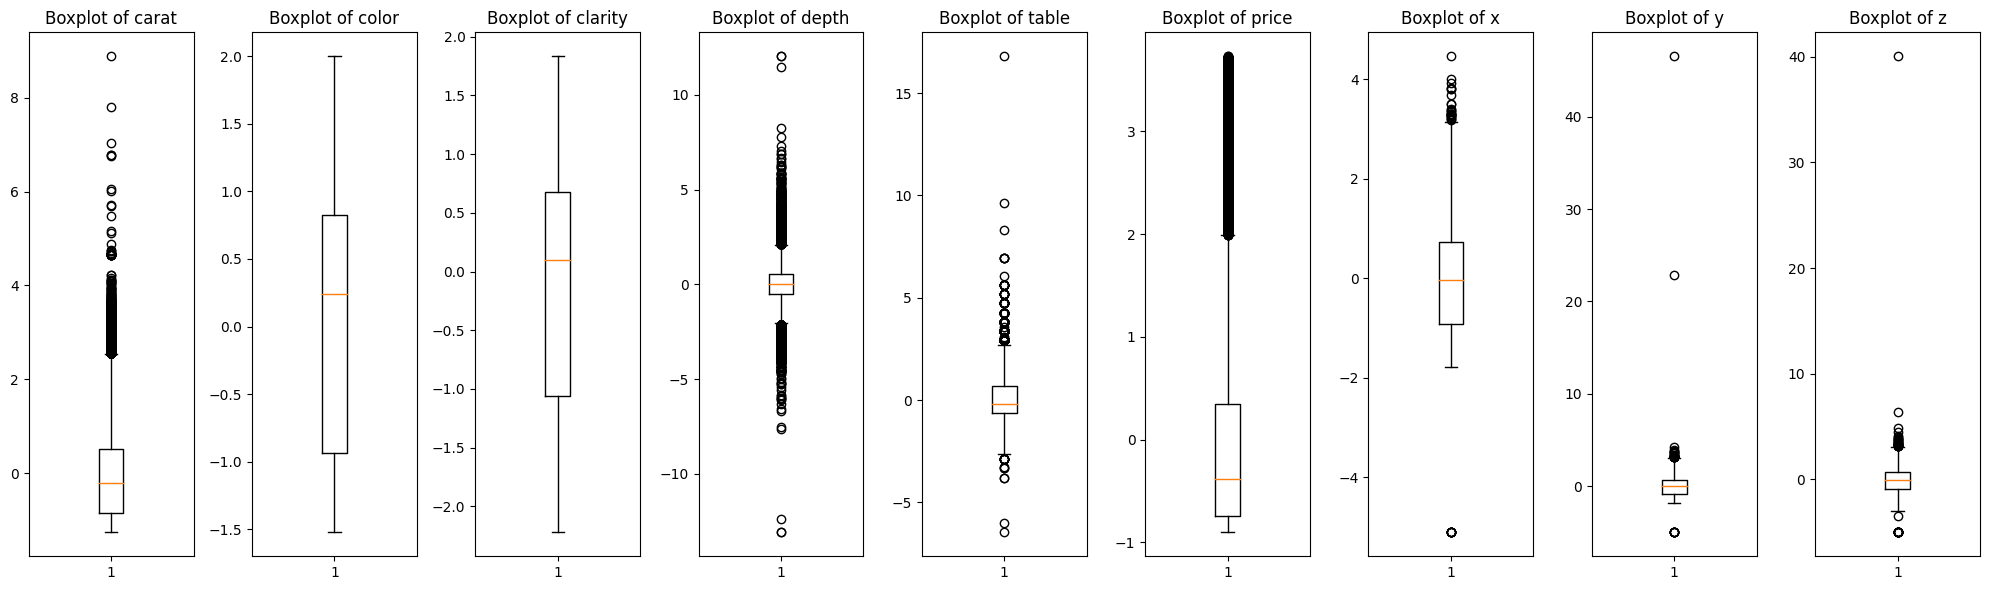

In [8]:
import matplotlib.pyplot as plt

features = ['carat', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']

plt.figure(figsize=(20, 6))  # Adjust the size as needed

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.boxplot(x=X[:,i])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
df2 = pd.DataFrame(X, columns=features)

for feature in features:
	Q1 = df2[feature].quantile(0.25)
	Q3 = df2[feature].quantile(0.75)
	IQR = Q3 - Q1

	lower_bound = Q1 - 1.5 * IQR
	upper_bound = Q3 + 1.5 * IQR

	df2 = df2[(df2[feature] >= lower_bound) & (df2[feature] <= upper_bound)]


In [ ]:
plt.figure(figsize=(20, 6))  # Adjust the size as needed

for i, feature in enumerate(features):
    plt.subplot(1, len(features), i+1)
    plt.boxplot(x=df2[feature])
    plt.title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()

In [ ]:
pd.DataFrame(X, columns=features).describe()

In [ ]:
df2.describe()

---
Now we start with the training and parameter tunning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from src.logreg import LogReg
import src.utils as utils

In [2]:
df = pd.read_csv("data/diamonds.csv")
X, y, scaler = utils.preprocessing(df)
X.shape, y.shape

((48748, 5), (48748,))

In [3]:
model = LogReg(epsilon = .0001, random_state = 42, penalty = "l2", max_iter = 10000)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
model.cross_validation(X_train, y_train, n_splits = 5, val_size = 0.2)

Performing cross validation


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Cross validation (accuracy) scores:
	mean: 0.6383076923076924 std: 0.0018585764384020634


[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.2s remaining:    3.3s
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:    2.2s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.3s finished


In [6]:
model.fit(X_train, y_train)

LogReg()

In [7]:
X_test[:10]

,carat,color,clarity,depth,table
16238,1.206861,0.238555,-0.484264,-1.500344,1.137995
11170,0.953700,1.414272,-0.484264,-0.523105,1.137995
40562,-0.818426,0.238555,1.255295,-0.523105,1.585529
29579,-0.818426,-0.937163,-1.064117,0.733344,-0.204605
6907,0.215314,0.826413,0.095589,-0.174092,0.690462
21178,0.911506,-0.349304,0.675442,-0.383500,0.242928
38396,-0.860620,0.238555,0.095589,0.663542,0.242928
20180,1.692086,1.414272,-0.484264,-0.662711,0.242928
50509,-0.206621,1.414272,0.095589,1.850189,1.137995
20513,1.270151,0.826413,0.675442,0.803147,-1.099672


In [8]:
model.conf_matrix(X_test, y_test)

array([[   0,   44,    2,    4,    1],
       [   0,  375,  181,  126,   73],
       [   0,    8, 3901,  153,  214],
       [   0,    4,  406, 1483,  562],
       [   0,  204,  835,  650,  524]], dtype=int64)

---

Things to take into account in the future:

data structuring: categorical ->numerical

remove outilers

data normalization

split data into training and validation

train models

msouibgui@cvc.uab.cat

---